## Ex 10.12

1. *Create a GeoDataFrame containing a list of countries and their capital cities. Add a geometry column with the locations of the capitals.* 

In [1]:
import pandas as pd

In [2]:
cities = pd.read_csv('/Users/shazia_manuawar/Documents/cities.csv')

In [3]:
cities.head()

,Country,Capital City,Latitude,Longitude,Population,Capital Type
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital


In [4]:
import geopandas as gpd

In [6]:
gdf = gpd.GeoDataFrame(cities, geometry = gpd.points_from_xy(cities['Longitude'], cities['Latitude']), crs = 4326)

In [7]:
gdf.head()

,Country,Capital City,Latitude,Longitude,Population,Capital Type,geometry
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital,POINT (69.1725 34.5289)
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital,POINT (19.8189 41.3275)
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital,POINT (3.042 36.7525)
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital,POINT (-170.7025 -14.2781)
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital,POINT (1.5211 42.5078)


<Axes: >

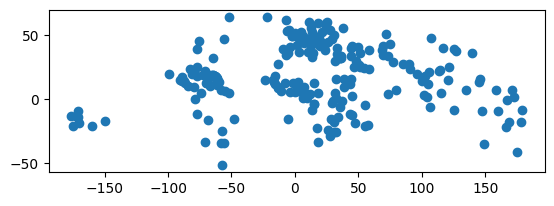

In [9]:
gdf.plot()

In [10]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
south_asia = gpd.read_file ('/Users/shazia_manuawar/Downloads/south_asia.geojson')

<Axes: >

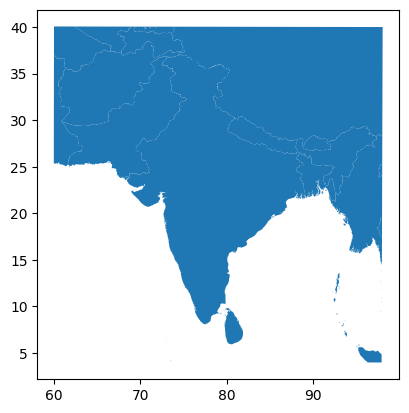

In [18]:
south_asia.plot()

In [19]:
south_asia.head()

,featurecla,NAME_LONG,cartodb _2,geometry
0,Admin-0 country,Afghanistan,Co-sponsor of Yoga Day resolution and OIC memb...,"MULTIPOLYGON (((73.19184 36.87703, 73.19184 36..."
1,Admin-0 country,Bangladesh,Co-sponsor of Yoga Day resolution and OIC memb...,"MULTIPOLYGON (((91.93873 21.71483, 91.97486 21..."
2,Admin-0 country,Bhutan,Co-sponsor of Yoga Day resolution and not an O...,"MULTIPOLYGON (((90.2618 28.33535, 90.2618 28.2..."
3,Admin-0 country,China,Co-sponsor of Yoga Day resolution and not an O...,"MULTIPOLYGON (((73.97277 40.03967, 98.05354 40..."
4,Admin-0 country,Indonesia,Co-sponsor of Yoga Day resolution and OIC memb...,"MULTIPOLYGON (((97.93595 4.84302, 97.93308 3.9..."


In [20]:
south_asia = south_asia.set_index ('NAME_LONG')
#ind_subcontitnent = south_asia [south_asia.loc ['NAME_LONG'] == 

In [31]:
ind_subcontinent = south_asia.loc [['India', 'Nepal', 'Bhutan']]
print (ind_subcontinent)

                featurecla                                         cartodb _2  \
NAME_LONG                                                                       
India      Admin-0 country  Co-sponsor of Yoga Day resolution and not an O...   
Nepal      Admin-0 country  Co-sponsor of Yoga Day resolution and not an O...   
Bhutan     Admin-0 country  Co-sponsor of Yoga Day resolution and not an O...   

                                                    geometry  
NAME_LONG                                                     
India      MULTIPOLYGON (((93.85532 7.21418, 93.865 7.200...  
Nepal      MULTIPOLYGON (((81.77902 30.35804, 81.8015 30....  
Bhutan     MULTIPOLYGON (((90.2618 28.33535, 90.2618 28.2...  


In [32]:
# output_file = 'ind_subcontinet.geojson'
ind_subcontinent.to_file ('/Users/shazia_manuawar/Downloads/ind_subcontinent.geojson', driver = 'GeoJSON')

3. *Perform a spatial join between two GeoDataFrames: one containing polygons (e.g., country borders) and one containing points (e.g., cities). Find out which points fall within which polygons.*

In [38]:
joined = gpd.sjoin (gdf [['Capital City', 'geometry']], south_asia [['geometry']], how = 'left')

In [39]:
print (joined)

              Capital City                    geometry    NAME_LONG
0                    Kabul     POINT (69.1725 34.5289)  Afghanistan
1          Tiranë (Tirana)     POINT (19.8189 41.3275)          NaN
2    El Djazaïr  (Algiers)       POINT (3.042 36.7525)          NaN
3                Pago Pago  POINT (-170.7025 -14.2781)          NaN
4         Andorra la Vella      POINT (1.5211 42.5078)          NaN
..                     ...                         ...          ...
229               Matu-Utu  POINT (-176.1745 -13.2816)          NaN
230               El Aaiún    POINT (-13.2014 27.1532)          NaN
231                Sana'a'     POINT (44.2078 15.3531)          NaN
232                 Lusaka    POINT (28.2771 -15.4134)          NaN
233                 Harare    POINT (31.0539 -17.8294)          NaN

[234 rows x 3 columns]


In [40]:
joined.type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
229    Point
230    Point
231    Point
232    Point
233    Point
Length: 234, dtype: object

In [41]:
joined.to_csv('/Users/shazia_manuawar/Downloads/joined.csv')

In [42]:
gdf.explore()

ImportError: The 'folium>=0.12', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge "folium>=0.12" matplotlib mapclassify' or 'pip install "folium>=0.12" matplotlib mapclassify'.

In [43]:
pip install "folium>=0.12" matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 24.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [folium]2m4/8 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [44]:
gdf.explore()